Replication of most of the plots and tables of the article

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Basics
import scipy.stats
import pickle, codecs
from collections import OrderedDict, defaultdict
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_context("paper")

In [2]:
# Load datasets
# all node metadata. This is just a pickled version of the citation_data.json from the original repo.
metadata = pickle.load(open("dataset/citation_data.p","rb"))
print(len(metadata)) # 37626 nodes

37626


In [3]:
# Load core
import csv
core_filename = "dataset/core_classification_core.csv"
core_info = dict()
with open(core_filename, newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=';', quotechar='"')
    next(csv_reader, None)  # skip the headers
    for row in csv_reader:
        if len(row) < 12:
            continue
        bid = row[1]
        category_age = row[11]
        category_type = row[10]
        core_info[bid] = {"age_category":int(category_age),"type_category":int(category_type)}
print(len(core_info)) # 769 core works

769


In [4]:
# Load classification for citers
# TODO: integrate in the data frame, basic stats
citers = "dataset/citers_subjects.csv"
citers_info = dict()
with codecs.open(citers, "r", encoding="utf-8") as f:
    csv_reader = csv.reader(f,delimiter=';', quotechar='"')
    next(csv_reader, None)  # skip the headers
    for row in csv_reader:
        if len(row) < 9:
            continue
        bid,author,year,title_corrected,general_category,keywords,typology,periods,subjects = row
        keywords = [x.strip() for x in keywords.split(";")]
        periods = [x.strip() for x in periods.split(";")]
        citers_info[bid] = {"title_corrected":title_corrected,"general_category":general_category,"keywords":keywords,
                           "typology":typology,"periods":periods,"subjects":subjects}
print(len(citers_info))

673


In [5]:
# create a data frame with all relevant variables
data = {"year": [y["year"] for y in metadata.values()], "lb": [y["lb"] for y in metadata.values()], "id": [y["id"] for y in metadata.values()],
                 "title": [metadata[x]["title"] if x not in citers_info.keys() else citers_info[x]["title_corrected"] for x in metadata.keys()], "publ_country": [y["publ_country"] if "publ_country" in y.keys() else None for y in metadata.values()],
                 "publ_language": [y["publ_language"] if "publ_language" in y.keys() else None for y in metadata.values()], "place": [y["place"] if "place" in y.keys() else None for y in metadata.values()], 
                 "in_degree": [len(y["cited"]) for y in metadata.values()], "out_degree": [len(y["citing"]) for y in metadata.values()], "availability": [len(y["available_at"]) if "available_at" in y.keys() else None for y in metadata.values()],
                 "author": [y["author"] for y in metadata.values()], "is_citing": [y["is_citing"] for y in metadata.values()], "is_cited": [y["is_cited"] for y in metadata.values()],
                 "core": [True if k in core_info.keys() else False for k in metadata.keys()],
                 "age_category": [core_info[k]["age_category"] if k in core_info.keys() else None for k in metadata.keys()], 
                 "type_category": [core_info[k]["type_category"] if k in core_info.keys() else None for k in metadata.keys()]
       }
df = pd.DataFrame(data=data,index=metadata.keys())
print(len(df)) # same number as metadata

37626


In [6]:
df.head()

,age_category,author,availability,core,id,in_degree,is_cited,is_citing,lb,out_degree,place,publ_country,publ_language,title,type_category,year
AGR0005487,NaN,"Hemingway, Ernest",1,False,22401,1,True,False,False,0,Milano,IT,ita,Addio alle armi,NaN,1965.0
ANA0001043,NaN,"Cortesi Bosco, Francesca",51,False,8350,1,True,False,False,0,Bergamo,IT,ita,Gli affreschi dell'oratorio Suardi : Lorenzo L...,NaN,1980.0
ANA0001102,NaN,"Rotondi, Pasquale",34,False,34088,3,True,False,False,0,Urbino,IT,ita,Il Palazzo ducale di Urbino,NaN,1950.0
ANA0002082,NaN,"Serra, Luigi",52,False,10306,1,True,False,False,0,Pesaro,IT,ita,L'arte nelle Marche,NaN,NaN
ANA0002363,NaN,"Colini, Francesco",8,False,19205,1,True,False,False,0,Jesi,IT,ita,Memorie storiche della citta di Jesi,NaN,1890.0


In [7]:
# store the data frame should it be needed
#df.to_pickle("dataset/metadata_df.p")

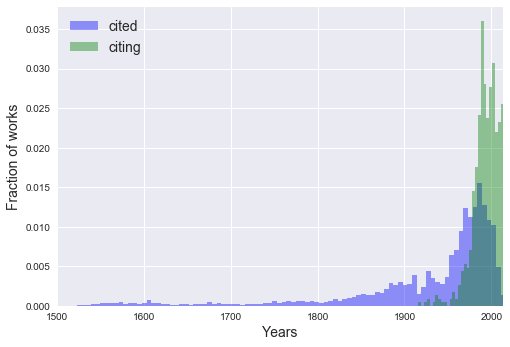

In [8]:
# age distributions
# both
sns.distplot(df["year"][df["year"].notnull()&df["is_cited"]].tolist(),bins=100,norm_hist=True,kde=False,color="blue",label="cited") #cited age
sns.distplot(df["year"][df["year"].notnull()&df["is_citing"]].tolist(),bins=30,norm_hist=True,kde=False,color="green",label="citing") #cited age
plt.xlim((1500,2014))
plt.xlabel("Years",fontsize=14)
plt.ylabel("Fraction of works",fontsize=14)
plt.legend(loc="best", fontsize=14)
#plt.savefig("figures/both_age.pdf", format='pdf')

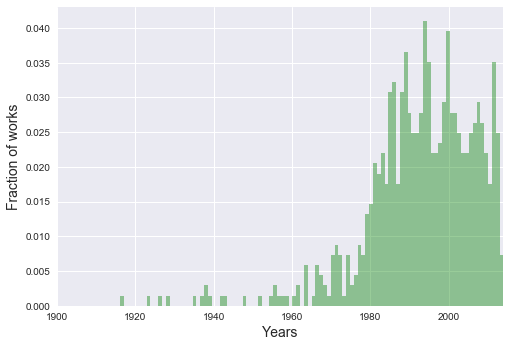

In [9]:
# Figure 2c in article
# age distributions
# citing
sns.distplot(df["year"][df["year"].notnull()&df["is_citing"]].tolist(),bins=100,norm_hist=True,kde=False,color="green") #cited age
plt.xlim((1900,2014))
plt.xlabel("Years",fontsize=14)
plt.ylabel("Fraction of works",fontsize=14)
#plt.savefig("figures/citing_age.pdf", format='pdf')

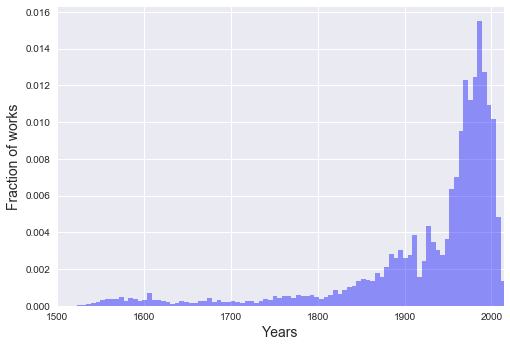

In [10]:
# Figure 2d in article
# age distributions
# citing
sns.distplot(df["year"][df["year"].notnull()&df["is_cited"]].tolist(),bins=100,norm_hist=True,kde=False,color="blue",label="cited") #cited age
plt.xlim((1500,2014))
plt.xlabel("Years",fontsize=14)
plt.ylabel("Fraction of works",fontsize=14)
#plt.savefig("figures/cited_age.pdf", format='pdf')

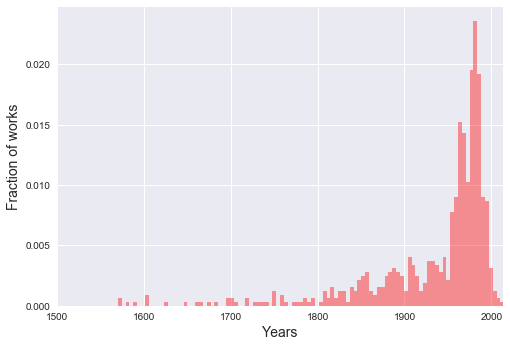

In [11]:
# age of core
sns.distplot(df["year"][df["year"].notnull()&df["core"]].tolist(),bins=100,norm_hist=True,kde=False,color="red",label="core")
plt.xlim((1500,2014))
plt.xlabel("Years",fontsize=14)
plt.ylabel("Fraction of works",fontsize=14)
#plt.savefig("figures/core_age.pdf", format='pdf')

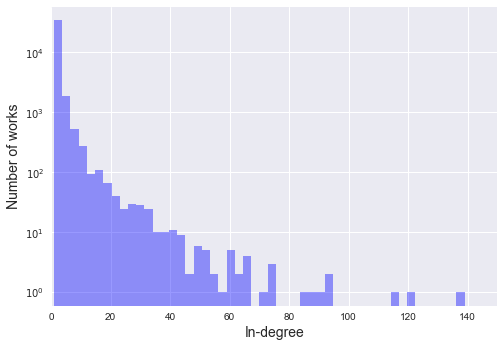

In [12]:
# Figure 1b in article
# degrees
# in degree
sns.distplot(df["in_degree"][df["in_degree"].notnull()&df["is_cited"]].tolist(),bins=50,norm_hist=False,kde=False,color="blue")
plt.xlim((0,150))
plt.xlabel("In-degree",fontsize=14)
plt.ylabel("Number of works",fontsize=14)
plt.yscale("log")
#plt.savefig("figures/degree_in.pdf", format='pdf')

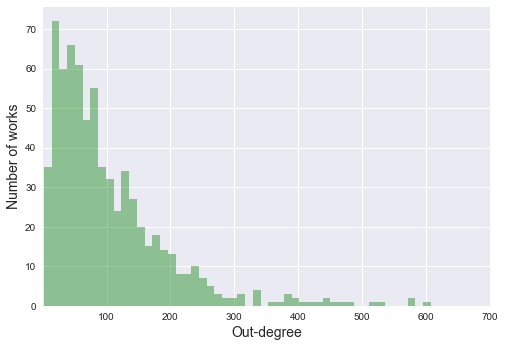

In [13]:
# Figure 1a in article
# degrees
# out degree
sns.distplot(df["out_degree"][df["out_degree"].notnull()&df["is_citing"]].tolist(),bins=50,norm_hist=False,kde=False,color="green")
plt.xlim((1,700))
plt.xlabel("Out-degree",fontsize=14)
plt.ylabel("Number of works",fontsize=14)
#plt.savefig("figures/degree_out.pdf", format='pdf')

In [14]:
# Tables 1 and 3 in article
# basic stats
print("How many citing works (sanity check)")
print(len(df["is_citing"][df["is_citing"] == True]))
print("How many cited works (sanity check)")
print(len(df["is_cited"][df["is_cited"] == True]))
print("How many in the core")
print(len(df["core"][df["core"] == True]))
print("How many per core category AGE")
print(len(df["core"][df["age_category"] == 1]))
print(len(df["core"][df["age_category"] == 1])*100/len(df["year"][(df["year"]<1800)&(df["is_cited"])]))
print(len(df["core"][df["age_category"] == 2]))
print(len(df["core"][df["age_category"] == 2])*100/len(df["year"][(df["year"]>=1800)&(df["year"]<1950)&(df["is_cited"])]))
print(len(df["core"][df["age_category"] == 3]))
print(len(df["core"][df["age_category"] == 3])*100/len(df["year"][(df["year"]>=1950)&(df["is_cited"])]))
print("Core age and is_citing")
print(len(df["core"][(df["age_category"] == 1) & (df["is_citing"]==True)]))
print(len(df["core"][(df["age_category"] == 2) & (df["is_citing"]==True)]))
print(len(df["core"][(df["age_category"] == 3) & (df["is_citing"]==True)]))
print("How many per core category TYPE")
print(len(df["core"][df["type_category"] == 1]))
print(len(df["core"][df["type_category"] == 2]))
print(len(df["core"][df["type_category"] == 3]))
print("Core type and is_citing")
print(len(df["core"][(df["type_category"] == 1) & (df["is_citing"]==True)]))
print(len(df["core"][(df["type_category"] == 2) & (df["is_citing"]==True)]))
print(len(df["core"][(df["type_category"] == 3) & (df["is_citing"]==True)]))
print("How many per top 5 provenances")
print(df["publ_country"].value_counts()[:5])
print("How many per top 5 languages")
print(df["publ_language"].value_counts()[:5])
print("How many is_citing per top 5 provenances")
print(df["publ_country"][df["is_citing"]].value_counts()[:5])
print("How many is_citing per top 5 languages")
print(df["publ_language"][df["is_citing"]].value_counts()[:5])

How many citing works (sanity check)
700
How many cited works (sanity check)
37362
How many in the core
769
How many per core category AGE
43
1.4144736842105263
249
2.4440518256772674
477
2.1913906372031056
Core age and is_citing
0
4
88
How many per core category TYPE
107
77
585
Core type and is_citing
1
2
89
How many per top 5 provenances
IT    24151
GB     3256
FR     3241
US     2635
DE     2055
Name: publ_country, dtype: int64
How many per top 5 languages
ita    23052
eng     6407
fre     3782
ger     2203
lat     1256
Name: publ_language, dtype: int64
How many is_citing per top 5 provenances
IT    540
GB     46
US     45
FR     25
DE     24
Name: publ_country, dtype: int64
How many is_citing per top 5 languages
ita    520
eng    112
fre     37
ger     25
lat      4
Name: publ_language, dtype: int64


In [22]:
# Price Index over 10 years (proportion of cited references published within 10 years from the citing one)
intervals = [(0,1980),(1980,1991),(1991,2002),(2002,2014)]
price_index = list()
top_sources = OrderedDict({i:defaultdict(int) for i in intervals})
for i in intervals:
    local_index = list()
    for m in metadata.values():
        if m["is_citing"] and m["year"]:
            if m["year"] >= i[0] and m["year"] < i[1]:
                local_list = [metadata[c]["year"] for c in m["citing"] if metadata[c]["year"]]
                local_index.append(len([l for l in local_list if l >= (m["year"]-10)])/len(local_list))
                for c in m["citing"]:
                    top_sources[i][c] += 1
    price_index.append((np.mean(local_index),np.median(local_index)))

In [23]:
price_index

[(0.23483912235585999, 0.21073190789473684),
 (0.22153898282691081, 0.20601237842617154),
 (0.21584758656708708, 0.20481927710843373),
 (0.20013297710549405, 0.193717277486911)]

In [30]:
# TOP cited sources per period
for i in intervals:
    top_sources[i] = OrderedDict(sorted(top_sources[i].items(),key=lambda x:x[1],reverse=True))
    print(i)
    for c in [x for x in top_sources[i].keys()][:10]:
        print(metadata[c]["author"]+" - "+str(metadata[c]["year"])+" - "+metadata[c]["title"]+" - "+metadata[c]["place"])

(0, 1980)
Cicogna, Emmanuele Antonio - 1824 - Delle inscrizioni veneziane - Venezia
Lorenzetti, Giulio - 1926 - Venezia e il suo estuario : guida storico-artistica - Venezia [ecc.
Gallicciolli, Giambattista - 1795 - Delle memorie venete antiche profane ed ecclesiastiche raccolte da Giambattista Gallicciolli. Libri tre. Tomo 1. [- 8. - In Venezia
Romanin, Samuele - None - Storia documentata di Venezia - Venezia
Molmenti, Pompeo - 1927 - La storia di Venezia nella vita privata dalle origini alla caduta della Repubblica - Bergamo
Davis, James Cushman - 1962 - The decline of the Venetian nobility as a ruling class - Baltimore
Paoletti, Pietro - 1893 - L'architettura e la scultura del Rinascimento in Venezia - Venezia
Corner, Flaminio - 1749 - Ecclesiae Torcellanae antiquis monumentis nunc etiam primum editis illustratae. Authore Flaminio Cornelio senatore veneto. Pars prima [-tertia, & ultima - Venetiis
Sansovino, Francesco - 1998 - Venetia cittá nobilissima et singolare - Venezia
Cicogna,

In [15]:
# overlap coefficents: how many citations are unique or to the core for every book
overlap_coefficents_core = list()
overlap_coefficents_age_1 = list()
overlap_coefficents_age_2 = list()
overlap_coefficents_age_3 = list()
overlap_coefficents_type_1 = list()
overlap_coefficents_type_2 = list()
overlap_coefficents_type_3 = list()
overlap_coefficents_unique = list()
len_ref_list = list()
index = list()
for k,v in metadata.items():
    if v["is_citing"]:
        index.append(k)
        overlap_coefficents_core.append(len([x for x in v["citing"] if x in core_info.keys()])/len(v["citing"]))
        overlap_coefficents_age_1.append(len([x for x in v["citing"] if x in core_info.keys() and core_info[x]["age_category"] == 1])/len(v["citing"]))
        overlap_coefficents_age_2.append(len([x for x in v["citing"] if x in core_info.keys() and core_info[x]["age_category"] == 2])/len(v["citing"]))
        overlap_coefficents_age_3.append(len([x for x in v["citing"] if x in core_info.keys() and core_info[x]["age_category"] == 3])/len(v["citing"]))
        overlap_coefficents_type_1.append(len([x for x in v["citing"] if x in core_info.keys() and core_info[x]["type_category"] == 1])/len(v["citing"]))
        overlap_coefficents_type_2.append(len([x for x in v["citing"] if x in core_info.keys() and core_info[x]["type_category"] == 2])/len(v["citing"]))
        overlap_coefficents_type_3.append(len([x for x in v["citing"] if x in core_info.keys() and core_info[x]["type_category"] == 3])/len(v["citing"]))
        overlap_coefficents_unique.append(len([x for x in v["citing"] if len(metadata[x]["cited"]) == 1])/len(v["citing"]))
        len_ref_list.append(len(v["citing"]))

(0, 1)

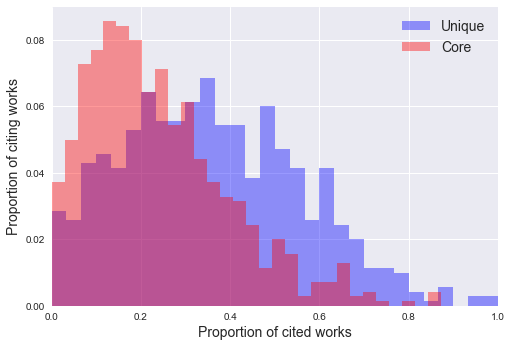

In [16]:
# proportion of citations to core and uniquely cited works
weights = np.ones_like(overlap_coefficents_unique)/len(overlap_coefficents_unique)
sns.distplot(overlap_coefficents_unique,bins=30, kde=False, rug=False, hist=True, norm_hist=False,hist_kws={"weights":weights},label="Unique",color="blue")
weights = np.ones_like(overlap_coefficents_core)/len(overlap_coefficents_core)
sns.distplot(overlap_coefficents_core,bins=30, kde=False, rug=False, hist=True, norm_hist=False,hist_kws={"weights":weights},label="Core",color="red")
#sns.kdeplot(np.array(overlap_coefficents), shade=True)
plt.xlabel("Proportion of cited works",fontsize=14)
plt.ylabel("Proportion of citing works",fontsize=14)
plt.legend(loc="best",fontsize=14)
plt.xlim((0,1))
#plt.savefig("figures/core_vs_unique_hist.pdf")

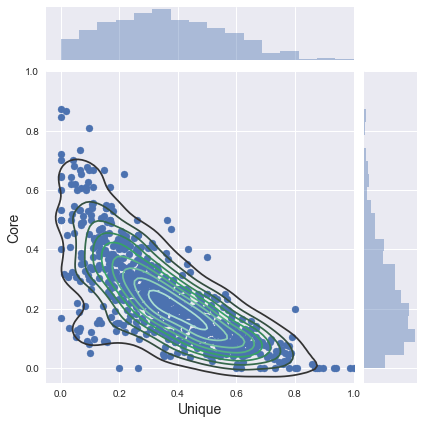

In [17]:
# Figure 6 in article
# proportion of citations to core and uniquely cited works
df_core = pd.DataFrame({"unique":pd.Series(overlap_coefficents_unique,index=index),"core":pd.Series(overlap_coefficents_core,index=index)})
sns.jointplot(x="unique", y="core", data=df_core, dropna=False, xlim=(-0.05,1), ylim=(-0.05,1), stat_func=None).plot_joint(sns.kdeplot, zorder=1, n_levels=10)
plt.xlabel("Unique",fontsize=14)
plt.ylabel("Core",fontsize=14)
#plt.savefig("figures/core_vs_unique.pdf")

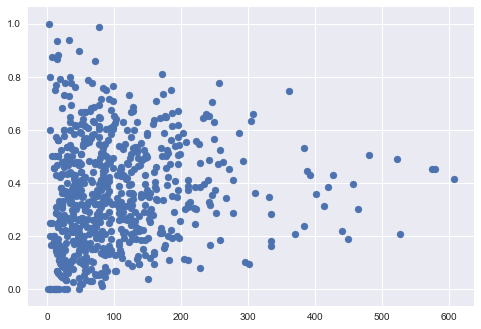

In [18]:
# proportion of unique vs length of reference list
plt.scatter(len_ref_list,overlap_coefficents_unique)

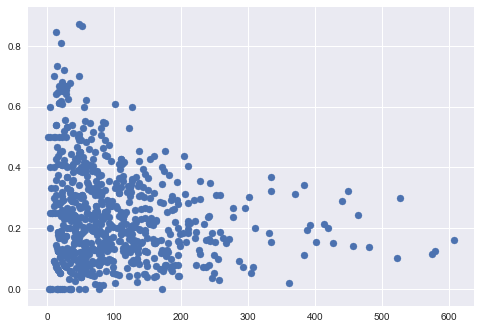

In [19]:
plt.scatter(len_ref_list,overlap_coefficents_core)

(0, 0.6)

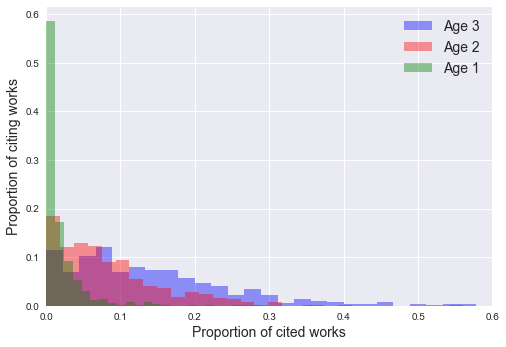

In [20]:
# Distribution of citations to core by AGE
weights = np.ones_like(overlap_coefficents_age_3)/len(overlap_coefficents_age_3)
sns.distplot(overlap_coefficents_age_3,bins=30, kde=False, rug=False, hist=True, norm_hist=False,hist_kws={"weights":weights},label="Age 3",color="blue")
weights = np.ones_like(overlap_coefficents_age_2)/len(overlap_coefficents_age_2)
sns.distplot(overlap_coefficents_age_2,bins=30, kde=False, rug=False, hist=True, norm_hist=False,hist_kws={"weights":weights},label="Age 2",color="red")
weights = np.ones_like(overlap_coefficents_age_1)/len(overlap_coefficents_age_1)
sns.distplot(overlap_coefficents_age_1,bins=30, kde=False, rug=False, hist=True, norm_hist=False,hist_kws={"weights":weights},label="Age 1",color="green")
plt.xlabel("Proportion of cited works",fontsize=14)
plt.ylabel("Proportion of citing works",fontsize=14)
plt.legend(loc="best",fontsize=14)
plt.xlim((0,0.6))
#plt.savefig("figures/core_classes_age_hist.pdf")

(0, 0.6)

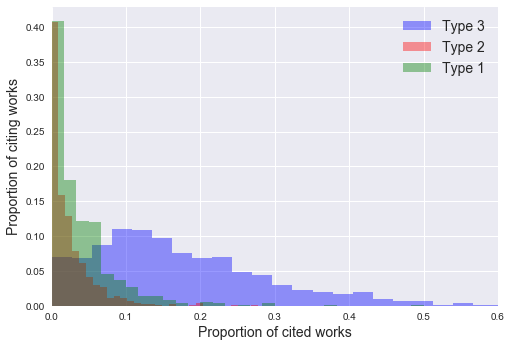

In [21]:
# Distribution of citations to core by TYPOLOGY
weights = np.ones_like(overlap_coefficents_type_3)/len(overlap_coefficents_type_3)
sns.distplot(overlap_coefficents_type_3,bins=30, kde=False, rug=False, hist=True, norm_hist=False,hist_kws={"weights":weights},label="Type 3",color="blue")
weights = np.ones_like(overlap_coefficents_type_2)/len(overlap_coefficents_type_2)
sns.distplot(overlap_coefficents_type_2,bins=30, kde=False, rug=False, hist=True, norm_hist=False,hist_kws={"weights":weights},label="Type 2",color="red")
weights = np.ones_like(overlap_coefficents_type_1)/len(overlap_coefficents_type_1)
sns.distplot(overlap_coefficents_type_1,bins=30, kde=False, rug=False, hist=True, norm_hist=False,hist_kws={"weights":weights},label="Type 1",color="green")
plt.xlabel("Proportion of cited works",fontsize=14)
plt.ylabel("Proportion of citing works",fontsize=14)
plt.legend(loc="best",fontsize=14)
plt.xlim((0,0.6))
#plt.savefig("figures/core_classes_type_hist.pdf")

In [22]:
# Figure 5 in article
# RIVER PLOTS: Flow chart of the use of core literature over time
typology = "type" # use type or age
window = 6 # smoothing window
start = 1950
end = 2014
n_bins = ((end-start)+1)//window

store_matrix = np.zeros((4,n_bins)) # no core plus 3 core categories
for n in range(n_bins):
    begin = start + (window*n)
    stop = begin + window - 1
    for k,v in metadata.items():
        if v["is_citing"] and v["year"] and v["year"] >= begin and v["year"] <= stop:
            for cited in v["citing"]:
                core_class = 0
                if cited in core_info.keys():
                    core_class = core_info[cited]["%s_category"%typology]
                store_matrix[core_class,n] += 1

In [24]:
store_matrix = np.nan_to_num(np.true_divide(store_matrix,np.sum(store_matrix,axis=0)))

(1950, 2004)

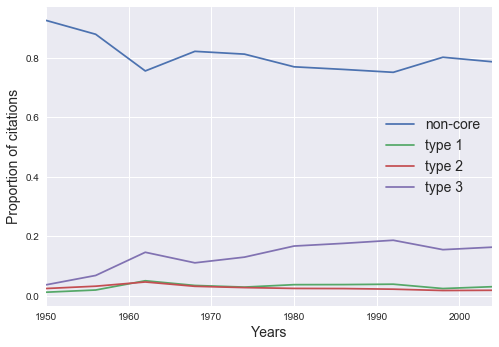

In [25]:
for row,label in zip(store_matrix,["non-core","%s 1"%typology,"%s 2"%typology,"%s 3"%typology]):
    plt.plot([start + (window*n) for n in range(n_bins)],row,label=label)
plt.legend(loc="best",fontsize=14)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Proportion of citations",fontsize=14)
plt.xlim([1950,2004])
#plt.savefig("figures/flow_core_%s.pdf"%typology)

In [26]:
# See discussion in Section 4
# explore classifications
print({x:len([y for y in citers_info.values() if y["general_category"] == x]) for x in set([t["general_category"] for t in citers_info.values()])})
print({x:len([y for y in citers_info.values() if y["typology"] == x]) for x in set([t["typology"] for t in citers_info.values()])})
keywords = defaultdict(int)
periods = defaultdict(int)
for v in citers_info.values():
    for k in v["keywords"]:
        keywords[k] += 1
    for p in v["periods"]:
        periods[p] += 1
print(sorted(keywords.items(),key=lambda x:x[1], reverse=True))
print(len(keywords))
print(sorted(periods.items(),key=lambda x:x[1], reverse=True))

{'history': 419, 'arts': 125, 'architecture': 129}
{'': 528, 'tool': 3, 'catalogue': 68, 'primary': 74}
[('social', 86), ('politics', 80), ('individuals', 62), ('churches', 52), ('urban', 45), ('religion', 44), ('crafts', 43), ('painting', 39), ('government', 35), ('', 29), ('literature', 26), ('empire', 23), ('palaces', 23), ('war', 22), ('mainland', 21), ('culture', 21), ('elites', 19), ('books', 18), ('maritime', 16), ('entertainment', 16), ('lagoon', 15), ('economics', 15), ('gender', 14), ('arts', 14), ('myth', 14), ('guilds', 13), ('commerce', 13), ('collecting', 13), ('1848', 12), ('monuments', 12), ('music', 11), ('industry', 9), ('jews', 8), ('health', 8), ('schools', 7), ('jewelry', 6), ('cartography', 6), ('finance', 4), ('archeology', 4), ('intellectual', 4), ('public finance', 2), ('family', 1), ('photography', 1)]
43
[('renaissance', 234), ('', 190), ('xviii', 161), ('xvii', 149), ('middle ages', 122), ('xix', 85), ('recent', 20)]


(1900, 2015)

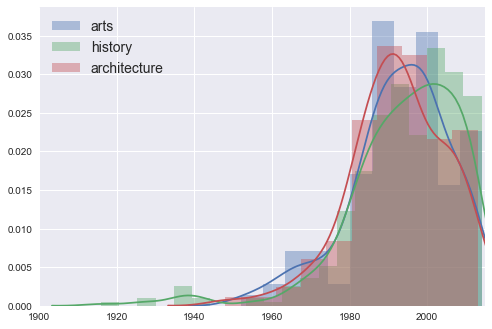

In [27]:
# Age of citing works by general category
gcs = ["arts","history","architecture"]
for gc in gcs:
    years_from = list()
    for k,v in metadata.items():
        if k in citers_info.keys() and citers_info[k]["general_category"] == gc:
            if v["year"]:
                years_from.append(v["year"])
    sns.distplot(years_from,label=gc)
plt.legend(loc="upper left",fontsize=14)
plt.xlim([1900,2015])

(1500, 2015)

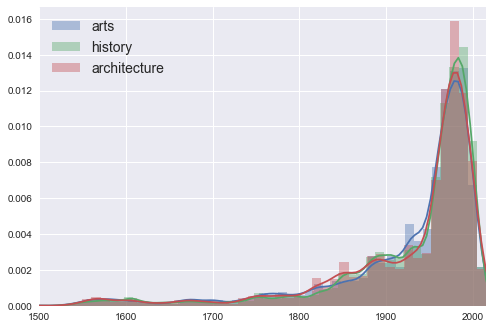

In [28]:
# Age of cited works by general category
gcs = ["arts","history","architecture"]
for gc in gcs:
    years_to = list()
    for k,v in metadata.items():
        if k in citers_info.keys() and citers_info[k]["general_category"] == gc:
            years_to.extend([metadata[x]["year"] for x in v["citing"] if metadata[x]["year"]])
    sns.distplot(years_to,label=gc)
plt.legend(loc="upper left",fontsize=14)
plt.xlim([1500,2015])